## Rain prediction in Australia

#### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report

<br>
<br>
<br>
<br>
<br>

#### Read dataset

In [3]:
dataframe= pd.read_csv(r"C:\Users\Lucio\Documents\Github\Next-day-rain-prediction\1- Data\1- Raw\weatherAUS.csv")
dataframe.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
dataframe.shape

(145460, 23)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
dataframe.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### Optimize numerical columns

In [7]:
def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    """
    This functions optimizes all of the FLOAT type 
    columns.
    """
    
    cols_float = df.select_dtypes(include=["float64"]).columns.tolist()
    df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float')
    
    return df

In [8]:
dataframe = optimize_floats(dataframe)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float32
 3   MaxTemp        144199 non-null  float32
 4   Rainfall       142199 non-null  float32
 5   Evaporation    82670 non-null   float32
 6   Sunshine       75625 non-null   float32
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float32
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float32
 12  WindSpeed3pm   142398 non-null  float32
 13  Humidity9am    142806 non-null  float32
 14  Humidity3pm    140953 non-null  float32
 15  Pressure9am    130395 non-null  float32
 16  Pressure3pm    130432 non-null  float32
 17  Cloud9am       89572 non-null

In [9]:
#Remove "Date" column from the dataset. It has no impact on the target variable
dataframe.drop("Date", axis=1, inplace=True)

<br>
<br>
<br>
<br>
<br>

#### Handle No/Yes values in target column

In [10]:
def yes_no_encoder(variable):
    """
    This function takes a Yes/No variable as an input
    and returns a codified version of it
    """
    if variable == "No":
        return 0
    
    elif variable == "Yes":
        return 1
    
    else:
        return variable  #Leave other values unchanged, including NaN

In [11]:
dataframe["RainTomorrow"] = dataframe["RainTomorrow"].apply(yes_no_encoder)
dataframe["RainToday"] = dataframe["RainToday"].apply(yes_no_encoder)
dataframe.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.700012,1007.099976,8.0,NaN,16.900000,21.799999,0.0,0.0
1,Albury,7.4,25.100000,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.599976,1007.799988,NaN,NaN,17.200001,24.299999,0.0,0.0
2,Albury,12.9,25.700001,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.599976,1008.700012,NaN,2.0,21.000000,23.200001,0.0,0.0
3,Albury,9.2,28.000000,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.599976,1012.799988,NaN,NaN,18.100000,26.500000,0.0,0.0
4,Albury,17.5,32.299999,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.799988,1006.000000,7.0,8.0,17.799999,29.700001,0.0,0.0


<br>
<br>
<br>
<br>
<br>

### Check null values in the dataset

In [12]:
def percentage_nan(data: pd.DataFrame):
    """
    This function calculates the percentage 
    of NaN values within all of the columns 
    of a dataframe.
    """
    
    columns = list(data.columns)
    percentages = {col:0 for col in columns}
    
    for col in columns:
        percentages[col] = round(100*data[col].isna().sum()/len(data.index), 2)
    
    return percentages

In [13]:
missing_vals_percentages = percentage_nan(dataframe)
missing_vals_percentages

{'Location': 0.0,
 'MinTemp': 1.02,
 'MaxTemp': 0.87,
 'Rainfall': 2.24,
 'Evaporation': 43.17,
 'Sunshine': 48.01,
 'WindGustDir': 7.1,
 'WindGustSpeed': 7.06,
 'WindDir9am': 7.26,
 'WindDir3pm': 2.91,
 'WindSpeed9am': 1.21,
 'WindSpeed3pm': 2.11,
 'Humidity9am': 1.82,
 'Humidity3pm': 3.1,
 'Pressure9am': 10.36,
 'Pressure3pm': 10.33,
 'Cloud9am': 38.42,
 'Cloud3pm': 40.81,
 'Temp9am': 1.21,
 'Temp3pm': 2.48,
 'RainToday': 2.24,
 'RainTomorrow': 2.25}

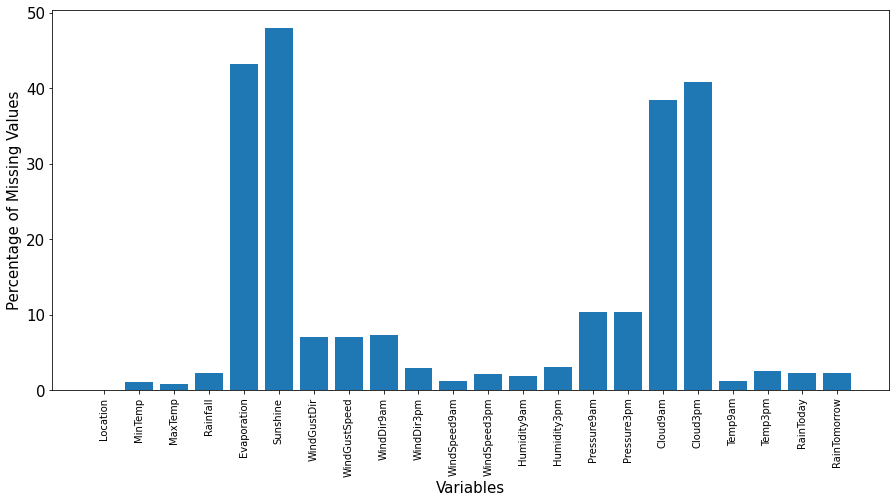

In [14]:
#Plot NaN percentages
plt.figure(figsize=(15,7))
plt.bar(missing_vals_percentages.keys(), missing_vals_percentages.values())

plt.xticks(rotation=90)
plt.yticks(fontsize=15)

plt.xlabel("Variables", fontsize=15)
plt.ylabel("Percentage of Missing Values", fontsize=15)
plt.show()

In [15]:
cols_missing_vals = {key: val for key,val in missing_vals_percentages.items() if val>0}
cols_missing_vals

{'MinTemp': 1.02,
 'MaxTemp': 0.87,
 'Rainfall': 2.24,
 'Evaporation': 43.17,
 'Sunshine': 48.01,
 'WindGustDir': 7.1,
 'WindGustSpeed': 7.06,
 'WindDir9am': 7.26,
 'WindDir3pm': 2.91,
 'WindSpeed9am': 1.21,
 'WindSpeed3pm': 2.11,
 'Humidity9am': 1.82,
 'Humidity3pm': 3.1,
 'Pressure9am': 10.36,
 'Pressure3pm': 10.33,
 'Cloud9am': 38.42,
 'Cloud3pm': 40.81,
 'Temp9am': 1.21,
 'Temp3pm': 2.48,
 'RainToday': 2.24,
 'RainTomorrow': 2.25}

In [16]:
THRESHOLD = 35

cols_to_remove = [key for key, val in cols_missing_vals.items() if val>=THRESHOLD]
cols_to_remove

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

In [17]:
dataframe_clean_1 = dataframe.drop(columns=cols_to_remove)
dataframe_clean_1.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.900000,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.700012,1007.099976,16.900000,21.799999,0.0,0.0
1,Albury,7.4,25.100000,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.599976,1007.799988,17.200001,24.299999,0.0,0.0
2,Albury,12.9,25.700001,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.599976,1008.700012,21.000000,23.200001,0.0,0.0
3,Albury,9.2,28.000000,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.599976,1012.799988,18.100000,26.500000,0.0,0.0
4,Albury,17.5,32.299999,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.799988,1006.000000,17.799999,29.700001,0.0,0.0


In [18]:
missing_vals_percentages = percentage_nan(dataframe_clean_1)
missing_vals_percentages

{'Location': 0.0,
 'MinTemp': 1.02,
 'MaxTemp': 0.87,
 'Rainfall': 2.24,
 'WindGustDir': 7.1,
 'WindGustSpeed': 7.06,
 'WindDir9am': 7.26,
 'WindDir3pm': 2.91,
 'WindSpeed9am': 1.21,
 'WindSpeed3pm': 2.11,
 'Humidity9am': 1.82,
 'Humidity3pm': 3.1,
 'Pressure9am': 10.36,
 'Pressure3pm': 10.33,
 'Temp9am': 1.21,
 'Temp3pm': 2.48,
 'RainToday': 2.24,
 'RainTomorrow': 2.25}

<br>
<br>
<br>
<br>
<br>

#### Save cleaned dataframed to csv file

In [190]:
dataframe_clean_1.to_csv(r"C:\Users\Lucio\Documents\Github\Next-day-rain-prediction\1- Data\2- Processed\dataframe_clean_1.csv")

dataframe_clean_1 characteristics:
- RainToday and RainTomorrow columns encoded from No/Yes to 0/1
- Drop columns with NaN percentage above 35%